In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:

# Define paths
train_dir = "/content/drive/MyDrive/dataset/Training"
test_dir = "/content/drive/MyDrive/dataset/Testing"

In [ ]:
# ImageDataGenerator for the training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory and apply transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary') # Use 'binary' for binary labels

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary') # Use 'binary' for binary labels


Found 48 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [ ]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax') # Changed to 2 for binary classification
])


In [ ]:



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Changed to 'sparse_categorical_crossentropy'
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
2/2 [==============================] - 10s 4s/step - loss: 1.9703 - accuracy: 0.4167 - val_loss: 3.3898 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 7s 3s/step - loss: 2.5605 - accuracy: 0.5000 - val_loss: 0.8545 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 8s 4s/step - loss: 0.3515 - accuracy: 0.8958 - val_loss: 1.7047 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 8s 6s/step - loss: 0.4681 - accuracy: 0.8750 - val_loss: 0.2168 - val_accuracy: 0.9167
Epoch 5/10
2/2 [==============================] - 6s 4s/step - loss: 0.1192 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 6s 4s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 8s 6s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.7570e-04 - val_accuracy: 1.0000
Epoch 8/10
2/2 [====================

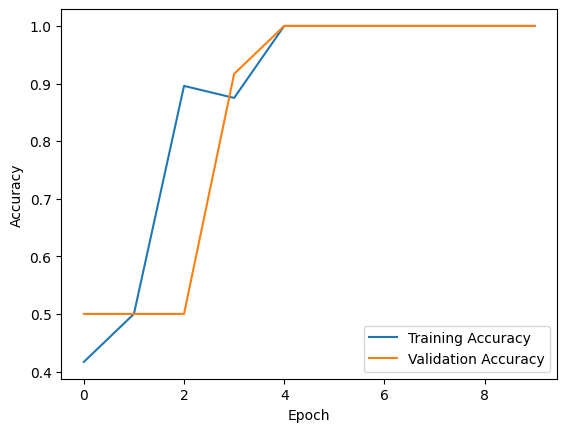

1/1 - 1s - loss: 8.0507e-05 - accuracy: 1.0000 - 553ms/epoch - 553ms/step
Test Accuracy: 1.0


In [ ]:



# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"Test Accuracy: {test_acc}")


In [ ]:


# Example of making a prediction
import cv2

def prepare_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

sample_image_path = '/WIN_20240223_17_59_51_Pro.jpg'
sample = prepare_image(sample_image_path)
prediction = model.predict(sample)

if np.argmax(prediction) == 0:
    print("Click")
else:
    print("No click")


1/1 [==============================] - 0s 52ms/step
No click
